## Import

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import Dataset
import torch
import copy

In [7]:
# https://www.kaggle.com/datasets/benhamner/sf-bay-area-bike-share?select=status.csv
dataset_station_statut = pd.read_csv("../Bike_Data/status.csv")
dataset_station = pd.read_csv("../Bike_Data/station.csv")

## Station statut dataset

In [12]:
dataset_station_statut.head(3)

,station_id,bikes_available,docks_available,time
0,2,2,25,2013/08/29 12:06:01
1,2,2,25,2013/08/29 12:07:01
2,2,2,25,2013/08/29 12:08:01


In [13]:
dataset_station_statut.shape

(71984434, 4)

## Station dataset

In [14]:
dataset_station.head(3)

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013


In [15]:
dataset_station.shape

(70, 7)

## Merge dataset Station statut and Station

In [16]:
dataset = pd.merge(dataset_station, dataset_station_statut, left_on='id', right_on='station_id')

In [17]:
dataset.head(3)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:06:01
1,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:07:01
2,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013,2,2,25,2013/08/29 12:08:01


In [18]:
dataset.shape

(71984434, 11)

## I/ (UNIVARIE) Selection one station to make prediction

### All id station available

In [19]:
print(dataset['id'].unique())
print(len(dataset['id'].unique()))

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 16 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 41 42 45 46 47 48 49 50 51 39 54 55 56 57 58 59
 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 80 82 83 84]
70


In [20]:
id = 21

In [21]:
dataset_station_id = dataset.loc[dataset['id'] == id]

In [22]:
dock_count = dataset_station_id['dock_count'].unique()[0]
print(dock_count)

15


In [23]:
dataset_station_id.shape

(1047141, 11)

In [24]:
dataset_station_id.head(5)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
14659094,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2013/08/29 12:06:01
14659095,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2013/08/29 12:07:01
14659096,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2013/08/29 12:08:01
14659097,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2013/08/29 12:09:01
14659098,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2013/08/29 12:10:01


In [25]:
dataset_station_id.tail(5)

,id,name,lat,long,dock_count,city,installation_date,station_id,bikes_available,docks_available,time
15706230,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2015-08-31 23:55:02
15706231,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2015-08-31 23:56:01
15706232,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2015-08-31 23:57:02
15706233,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2015-08-31 23:58:02
15706234,21,Franklin at Maple,37.481758,-122.226904,15,Redwood City,8/12/2013,21,8,7,2015-08-31 23:59:02


### Drop station_id and keep id

In [26]:
dataset_station_id_transform = dataset_station_id.drop(['station_id', "name", 'lat', 'long', 'id', 'city', 'installation_date'], axis=1)

In [27]:
dataset_station_id_transform.head(3)

,dock_count,bikes_available,docks_available,time
14659094,15,8,7,2013/08/29 12:06:01
14659095,15,8,7,2013/08/29 12:07:01
14659096,15,8,7,2013/08/29 12:08:01


### Check presence of null and NaN values

In [28]:
dataset_station_id_transform.isna().sum()

dock_count         0
bikes_available    0
docks_available    0
time               0
dtype: int64

In [29]:
dataset_station_id_transform[dataset_station_id_transform.isna().any(axis=1)]

,dock_count,bikes_available,docks_available,time


In [30]:
dataset_station_id_transform.dtypes

dock_count          int64
bikes_available     int64
docks_available     int64
time               object
dtype: object

### Conversion column time to datetime

In [31]:
dataset_station_id_transform['time'] = pd.to_datetime(dataset_station_id_transform['time'])

In [32]:
dataset_station_id_transform.dtypes

dock_count                  int64
bikes_available             int64
docks_available             int64
time               datetime64[ns]
dtype: object

### 1) Group by Weekday

In [33]:
weekday_dict = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
                3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [34]:
df_weekday_name = dataset_station_id_transform.groupby(dataset_station_id_transform['time'].dt.dayofweek.map(weekday_dict)).mean()
df_weekday_name

C:\Users\gcogoni\AppData\Local\Temp\ipykernel_3704\3025791640.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekday_name = dataset_station_id_transform.groupby(dataset_station_id_transform['time'].dt.dayofweek.map(weekday_dict)).mean()


,dock_count,bikes_available,docks_available
time,,,
Friday,15.0,6.626708,8.367754
Monday,15.0,6.588424,8.411576
Saturday,15.0,6.623896,8.375562
Sunday,15.0,6.589415,8.409722
Thursday,15.0,6.620737,8.367182
Tuesday,15.0,6.636718,8.351984
Wednesday,15.0,6.636388,8.347143


#### Focus on bikes available

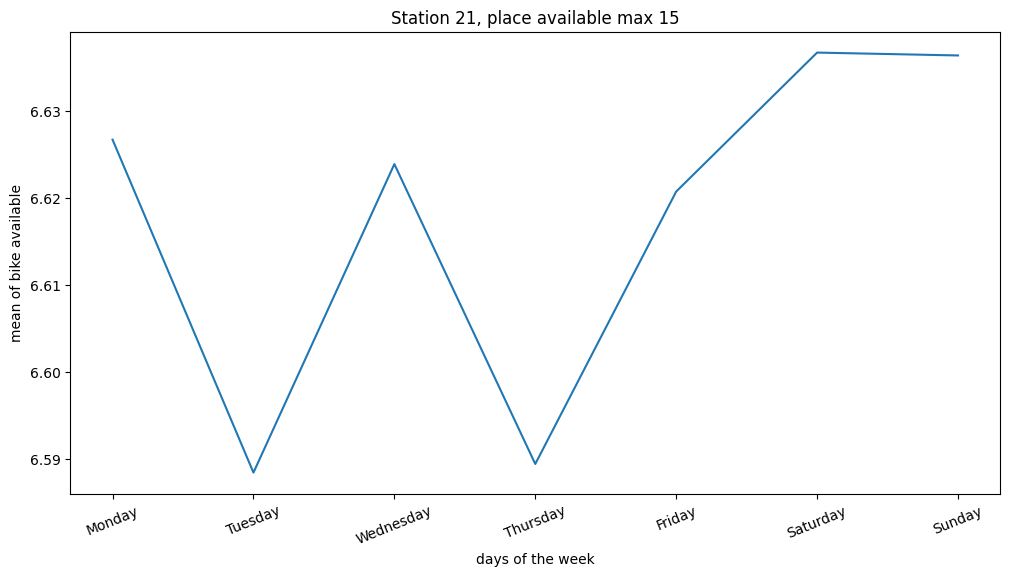

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_weekday_name.index, df_weekday_name['bikes_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('days of the week')
plt.ylabel('mean of bike available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des jours de la semaine
jours_semaine = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), jours_semaine)
plt.xticks(rotation=22)

# Afficher le titre du graphique
plt.title(f'Station {id}, place available max {dock_count}')

# Afficher le graphique
plt.show()

### 2) Group by month

In [36]:
month_dict = {1: 'Jan', 2: 'Fév', 3: 'Mar', 4: 'Avr', 5: 'Mai', 6: 'Juin', 7: 'Juil', 8: 'Août', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Déc'}

In [37]:
# Extraire le nom de chaque mois à partir de la colonne 'time'
dataset_station_id_month = dataset_station_id_transform.copy()
dataset_station_id_month['month_name'] = dataset_station_id_month['time'].dt.month_name(locale='English')
# Regrouper les données par mois et calculer la moyenne pour chaque mois
df_monthly_mean = dataset_station_id_month.groupby('month_name').mean()
df_monthly_mean

C:\Users\gcogoni\AppData\Local\Temp\ipykernel_3704\2968746899.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_mean = dataset_station_id_month.groupby('month_name').mean()


,dock_count,bikes_available,docks_available
month_name,,,
April,15.0,5.965607,9.034393
August,15.0,6.413811,8.586189
December,15.0,6.289419,8.670875
February,15.0,5.961267,9.038733
January,15.0,5.978236,8.994520
July,15.0,6.271778,8.727347
June,15.0,8.120602,6.879398
March,15.0,5.732836,9.267164
May,15.0,5.702391,9.297609


#### Focus on bikes available

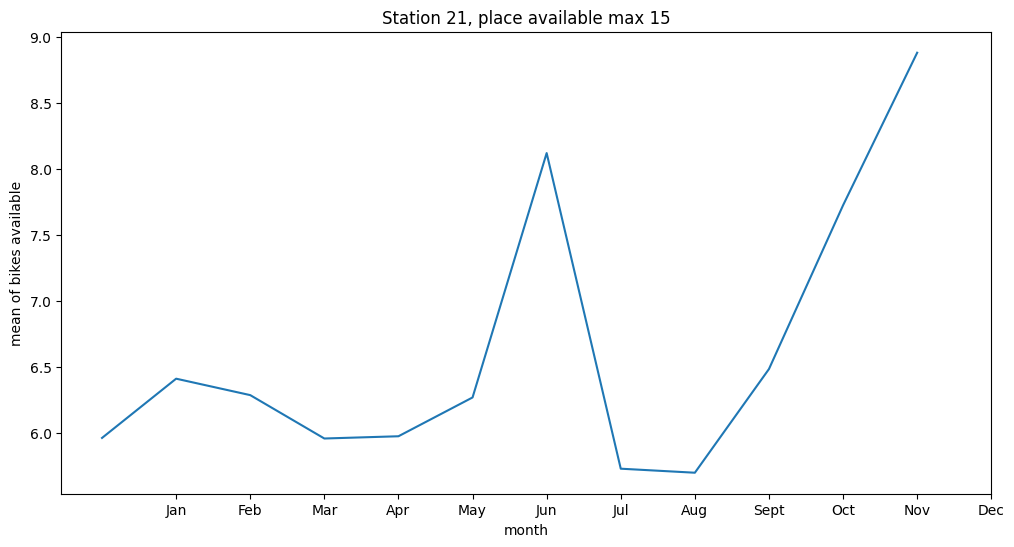

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_monthly_mean.index, df_monthly_mean['bikes_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('month')
plt.ylabel('mean of bikes available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des mois
mois = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.xticks(range(1,13), mois)

# Afficher le titre du graphique
plt.title(f'Station {id}, place available max {dock_count}')

# Afficher le graphique
plt.show()


### 3) Group by day and hour

In [39]:
len(dataset_station_id_transform[dataset_station_id_transform.isna().any(axis=1)])

0

In [40]:
print(dataset_station_id_transform.count())
dataset_station_id_transform

dock_count         1047141
bikes_available    1047141
docks_available    1047141
time               1047141
dtype: int64


,dock_count,bikes_available,docks_available,time
14659094,15,8,7,2013-08-29 12:06:01
14659095,15,8,7,2013-08-29 12:07:01
14659096,15,8,7,2013-08-29 12:08:01
14659097,15,8,7,2013-08-29 12:09:01
14659098,15,8,7,2013-08-29 12:10:01
...,...,...,...,...
15706230,15,8,7,2015-08-31 23:55:02
15706231,15,8,7,2015-08-31 23:56:01
15706232,15,8,7,2015-08-31 23:57:02
15706233,15,8,7,2015-08-31 23:58:02


In [41]:
df_weekday_hour = dataset_station_id_transform.groupby(by=pd.Grouper(key='time', freq='H'), dropna=True).mean()

In [42]:
len(df_weekday_hour[df_weekday_hour.isna().any(axis=1)])

50

In [43]:
df_weekday_hour = df_weekday_hour.dropna()

In [44]:
len(df_weekday_hour[df_weekday_hour.isna().any(axis=1)])

0

In [45]:
df_weekday_hour.head(5)

,dock_count,bikes_available,docks_available
time,,,
2013-08-29 12:00:00,15.0,8.0,7.0
2013-08-29 13:00:00,15.0,8.0,7.0
2013-08-29 14:00:00,15.0,8.0,7.0
2013-08-29 15:00:00,15.0,8.0,7.0
2013-08-29 16:00:00,15.0,8.0,7.0


In [46]:
df_weekday_hour.tail(5)

,dock_count,bikes_available,docks_available
time,,,
2015-08-31 19:00:00,15.0,7.416667,7.583333
2015-08-31 20:00:00,15.0,7.466667,7.533333
2015-08-31 21:00:00,15.0,7.666667,7.333333
2015-08-31 22:00:00,15.0,7.750000,7.250000
2015-08-31 23:00:00,15.0,7.666667,7.333333


In [47]:
df_weekday_hour[:'2013-08-30 12:00:00']

,dock_count,bikes_available,docks_available
time,,,
2013-08-29 12:00:00,15.0,8.000000,7.000000
2013-08-29 13:00:00,15.0,8.000000,7.000000
2013-08-29 14:00:00,15.0,8.000000,7.000000
2013-08-29 15:00:00,15.0,8.000000,7.000000
2013-08-29 16:00:00,15.0,8.000000,7.000000
2013-08-29 17:00:00,15.0,8.000000,7.000000
2013-08-29 18:00:00,15.0,8.962963,6.037037
2013-08-29 19:00:00,15.0,7.890909,7.109091
2013-08-29 20:00:00,15.0,9.000000,6.000000


#### Focus on bikes available

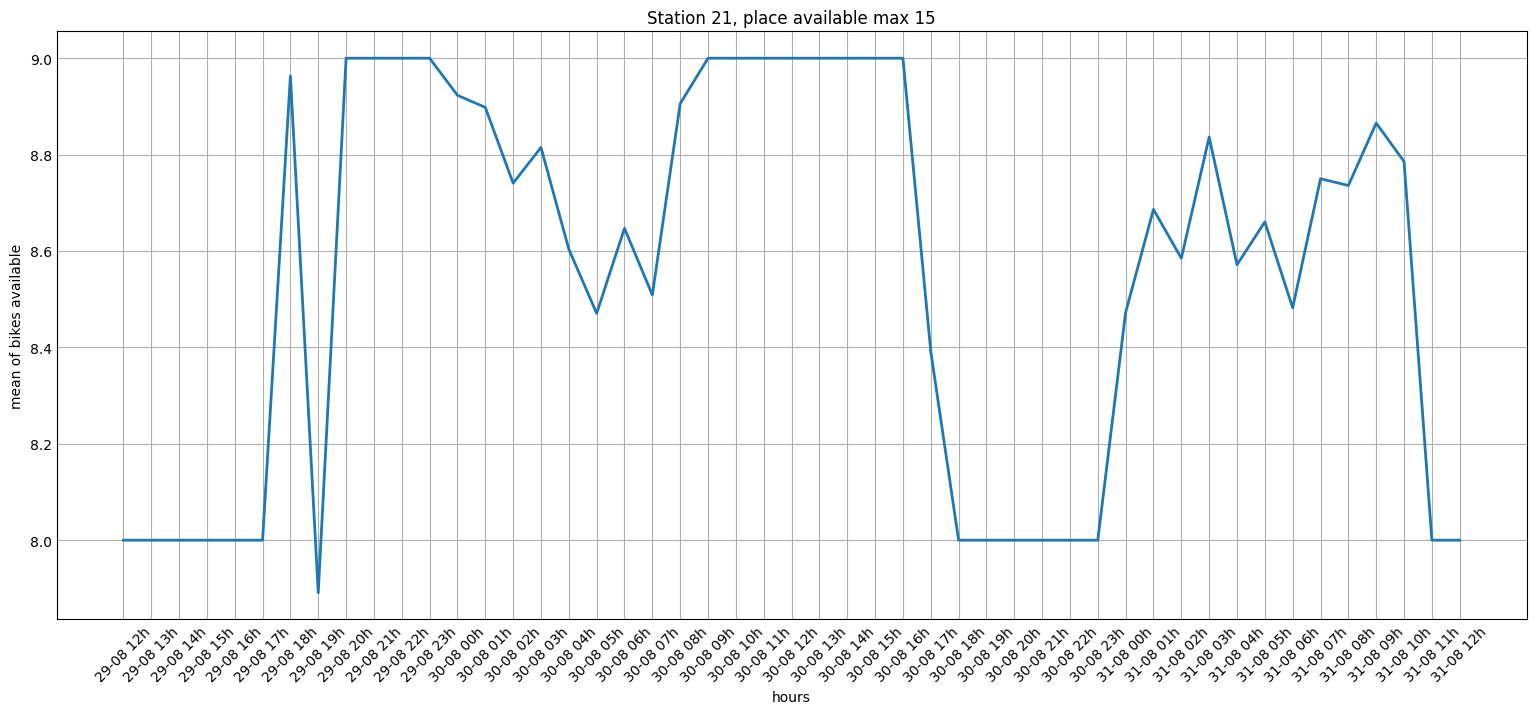

In [48]:
plt.style.use('_mpl-gallery')

fig, ax = plt.subplots(figsize=(15, 6))

# make data
x = [date.strftime('%d-%m %Hh') for date in df_weekday_hour[:'2013-08-31 12:00:00'].index]
y = df_weekday_hour[:'2013-08-31 12:00:00']['bikes_available']

# plot
plt.xlabel('hours')
plt.ylabel('mean of bikes available')
plt.xticks(rotation=45)
ax.plot(x, y, linewidth=2)

# Afficher le titre du graphique
plt.title(f'Station {id}, place available max {dock_count}')

plt.show()

In [49]:
df_weekday_hour.index

DatetimeIndex(['2013-08-29 12:00:00', '2013-08-29 13:00:00',
               '2013-08-29 14:00:00', '2013-08-29 15:00:00',
               '2013-08-29 16:00:00', '2013-08-29 17:00:00',
               '2013-08-29 18:00:00', '2013-08-29 19:00:00',
               '2013-08-29 20:00:00', '2013-08-29 21:00:00',
               ...
               '2015-08-31 14:00:00', '2015-08-31 15:00:00',
               '2015-08-31 16:00:00', '2015-08-31 17:00:00',
               '2015-08-31 18:00:00', '2015-08-31 19:00:00',
               '2015-08-31 20:00:00', '2015-08-31 21:00:00',
               '2015-08-31 22:00:00', '2015-08-31 23:00:00'],
              dtype='datetime64[ns]', name='time', length=17530, freq=None)

### 4) Group by hours

In [50]:
df_hourly = df_weekday_hour.groupby(df_weekday_hour.index.strftime('%H')).mean()

In [51]:
df_hourly

,dock_count,bikes_available,docks_available
time,,,
00,15.0,6.648073,8.346211
01,15.0,6.657752,8.335582
02,15.0,6.658929,8.333974
03,15.0,6.655248,8.337492
04,15.0,6.653823,8.339282
05,15.0,6.650847,8.341961
06,15.0,6.640973,8.352064
07,15.0,6.606566,8.386105
08,15.0,6.581693,8.410613


#### Focus on bikes available

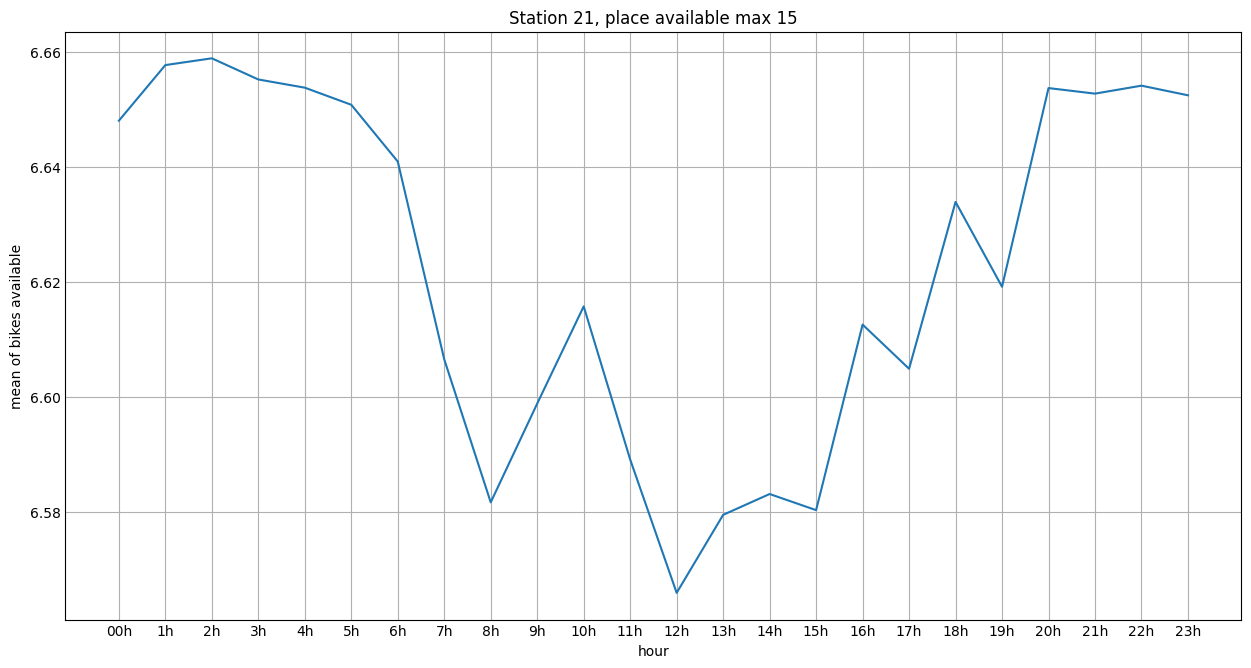

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Tracer la courbe
plt.plot(df_hourly.index, df_hourly['bikes_available'])

# Ajouter des étiquettes pour l'axe x et y
plt.xlabel('hour')
plt.ylabel('mean of bikes available')

# Changer les étiquettes de l'axe x pour qu'elles affichent les noms des mois
hours = ['00h', '1h', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', '11h', '12h', '13h', '14h', '15h',
        '16h', '17h', '18h', '19h', '20h', '21h', '22h', '23h']
plt.xticks(range(0,24), hours)

# Afficher le titre du graphique
plt.title(f'Station {id}, place available max {dock_count}')

# Afficher le graphique
plt.show()


## Analyse Geospatial

### Map

In [8]:
import folium
from folium import plugins
from folium.plugins import HeatMap

heatmap = folium.Map([dataset_station["lat"].median(),dataset_station["long"].median()],zoom_start=10,tiles='Stamen Toner')
stations_loc = [[float(dataset_station.lat.values[i]),float(dataset_station.long.values[i])] for i in range(len(dataset_station))]
heatmap.add_child(HeatMap(stations_loc,radius=10))
for index,row in dataset_station.iterrows():
    folium.Marker([float(row['lat']),float(row['long'])],popup=row['name']).add_to(heatmap)

In [9]:
heatmap

In [19]:
import osmnx as ox
import networkx as nx


start_point = [37.804306, -122.514581]
end_point = [37.279913, -121.727255]

# Télécharger le graphe routier d'OpenStreetMap pour la région couvrant les deux points
G = ox.graph_from_bbox(max(start_point[0], end_point[0]), min(start_point[0], end_point[0]), 
                        max(start_point[1], end_point[1]), min(start_point[1], end_point[1]), 
                        network_type='bike')

In [ ]:
# Trouver les nœuds les plus proches des points de départ et d'arrivée sur le graphe
start_node = ox.distance.nearest_nodes(G, -121.89670033475272, 37.342308095980805) ,
end_node = ox.distance.nearest_nodes(G, 37.330647879487934, -121.90238698400027)

# Calculer le plus court chemin en voiture entre le point de départ et d'arrivée
route = nx.shortest_path(G, start_node, end_node, weight='length')

# Calculer la distance totale de la route
distance = sum(ox.utils_graph.get_route_edge_attributes(G, route, 'length'))

print("La distance entre les deux points est de :", round(distance/1000, 2), "kilomètres")
print("Le temps de trajet est", round(distance/1000, 2)/15, "heures")